In [1]:
#데이터 전처리(레이블 인코딩)

from sklearn.preprocessing import LabelEncoder
items = ["tv",
"냉장고"
,
"컴퓨터"
,
"전자레인지"
,
"믹서"
,
"선풍기"
,
"믹서"]
encoder = LabelEncoder()
encoder.fit(items) #아이템 학습
labels = encoder.transform(items)

print('labels:', labels) #라벨을 찍어봄
print('encoder.classes:', encoder.classes_) #갖고 있는 라벨의 값들을 확인하는 것
print('encoder.inverse_transform :',encoder.inverse_transform([4, 5, 3, 2, 4, 2, 0, 1, 1]))


labels: [0 1 5 4 2 3 2]
encoder.classes: ['tv' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
encoder.inverse_transform : ['전자레인지' '컴퓨터' '선풍기' '믹서' '전자레인지' '믹서' 'tv' '냉장고' '냉장고']


In [3]:
#데이터 전처리(원핫 인코딩)

import pandas as pd
df=pd.DataFrame({'items':items})
print(df)
print(pd.get_dummies(df))

   items
0     tv
1    냉장고
2    컴퓨터
3  전자레인지
4     믹서
5    선풍기
6     믹서
   items_tv  items_냉장고  items_믹서  items_선풍기  items_전자레인지  items_컴퓨터
0         1          0         0          0            0          0
1         0          1         0          0            0          0
2         0          0         0          0            0          1
3         0          0         0          0            1          0
4         0          0         1          0            0          0
5         0          0         0          1            0          0
6         0          0         1          0            0          0


In [ ]:
# 데이터 스케일링

StandardScalrer() #평균이 0이고 분산이 1인 정규분포로 만드는 것, 평균으로부터 얼마나 떨어져 있는지를 구한 것
MinMaxScaler() # 최대값은 1, 최소값은 0으로 최소-최대 정규화 MinMax
RobustScaler() #중앙값은 0, 1IQR ~ 3IQR = 1 이상치 영향 최소화 후 넓게 분포 / 지나친 이상치가 이걸 표현하는데 얼마나 영향을 끼치는지
Normalizer() # 열을 대상으로 함. 한 행의 모든 피쳐들 사이의 유클리드 거리가 1이 되도록 데이터값 생성/ 좀 더 빠르게 학습, 특정한 한 열이 얼마나 영향을 끼치는지
MaxAbsScaler() # 최대 절대값과 0이 각 1, 0이 되도록 하여 양수 데이터로만 구성되게 스케일링

#데이터 순서 : 데이터 프레임 형식으로 가져오기->분포 보고 결측치 처리하고->데이터 표준화 등등 스케일

In [4]:
#유방암 데이터 실습

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer


cancer=load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=3)
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print('정확도 :', round(dtc.score(X_test,y_test),4))

정확도 : 0.8947


In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [16]:
from sklearn.preprocessing import StandardScaler

# Standardization 평균 0 / 분산 1
std = StandardScaler()

# 교차검증시
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)
dtc.fit(X_train_scaled, y_train)

print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.886


In [17]:
X_train_scaled

array([[ 1.40381088,  1.79283426,  1.37960065, ...,  1.044121  ,
         0.52295995,  0.64990763],
       [ 1.16565505, -0.14461158,  1.07121375, ...,  0.5940779 ,
         0.44153782, -0.85281516],
       [-0.0307278 , -0.77271123, -0.09822185, ..., -0.64047556,
        -0.31161687, -0.69292805],
       ...,
       [ 1.06478904,  0.20084323,  0.89267396, ...,  0.01694621,
         3.06583565, -1.29952679],
       [ 1.51308238,  2.3170559 ,  1.67987211, ...,  1.14728703,
        -0.16599653,  0.82816016],
       [-0.73678981, -1.02636686, -0.74380549, ..., -0.31826862,
        -0.40713129, -0.38233653]])

In [18]:
X_train

array([[1.916e+01, 2.660e+01, 1.262e+02, ..., 1.872e-01, 3.258e-01,
        9.720e-02],
       [1.831e+01, 1.858e+01, 1.186e+02, ..., 1.571e-01, 3.206e-01,
        6.938e-02],
       [1.404e+01, 1.598e+01, 8.978e+01, ..., 7.453e-02, 2.725e-01,
        7.234e-02],
       ...,
       [1.795e+01, 2.001e+01, 1.142e+02, ..., 1.185e-01, 4.882e-01,
        6.111e-02],
       [1.955e+01, 2.877e+01, 1.336e+02, ..., 1.941e-01, 2.818e-01,
        1.005e-01],
       [1.152e+01, 1.493e+01, 7.387e+01, ..., 9.608e-02, 2.664e-01,
        7.809e-02]])

In [20]:
print(X_train_scaled.shape,
X_train.shape)

(455, 30) (455, 30)


In [21]:
X_train_scaled_ss = X_train_scaled.reshape(13650,1)
X_train_data = X_train.reshape(13650,1)

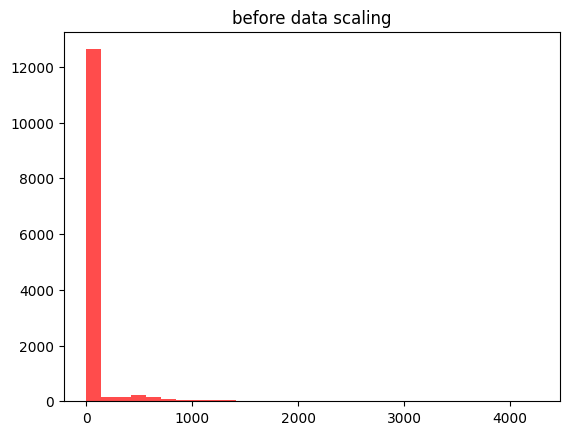

In [23]:
plt.hist(X_train_data, bins=30, color= 'red', alpha = 0.7)
plt.title('before data scaling')
plt.show()

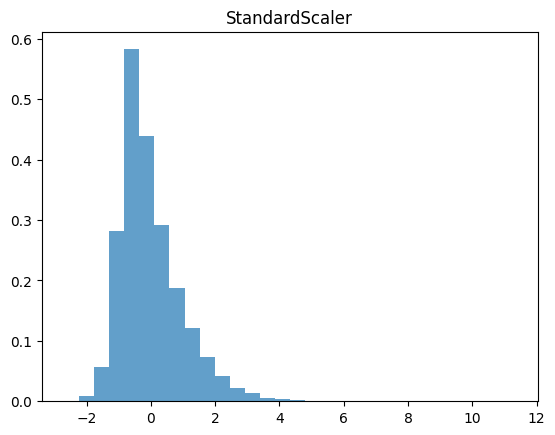

In [24]:
plt.hist(X_train_scaled_ss, bins=30, alpha = 0.7, density = True)
plt.title('StandardScaler')
plt.show()

In [25]:
#MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

#normalization 최소값 0 / 최대값 1
mms = MinMaxScaler()

#교차검증시
mms.fit(X_train)
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)
dtc.fit(X_train_scaled, y_train)

print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.886


In [26]:
X_train_scaled

array([[0.56168275, 0.7081761 , 0.55664674, ..., 0.64329897, 0.33372758,
        0.27653155],
       [0.52005485, 0.37190776, 0.50256191, ..., 0.53986254, 0.32347723,
        0.09405746],
       [0.31093589, 0.26289308, 0.29746655, ..., 0.25611684, 0.22866154,
        0.11347239],
       ...,
       [0.50242421, 0.43186583, 0.47124964, ..., 0.40721649, 0.65385374,
        0.03981372],
       [0.5807826 , 0.79916143, 0.60930828, ..., 0.66701031, 0.24699389,
        0.29817657],
       [0.18752143, 0.21886792, 0.18424424, ..., 0.33017182, 0.2166371 ,
        0.1511872 ]])

In [34]:
# MaxAbsScaler() : 최대값은 1 최소값은 0으로 최소-최대 정규화 Min-Max Normalization 이상치에 취약


from sklearn.preprocessing import MaxAbsScaler

#절대값
scaler = MaxAbsScaler()

#교차검증시
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9123


In [35]:
# RobustScaler(): 중앙값은 0 / IQR(1분위(25%) ~ 3분위(75%)) = 1, 이상치(outlier) 영향 최소화하고 더 넓게 분포 됨

from sklearn.preprocessing import RobustScaler

#중앙값0/IQR 1
rbs = RobustScaler()

#교차검증시
X_train_scaled = rbs.fit_transform(X_train)
X_test_scaled = rbs.transform(X_test)
dtc.fit(X_train_scaled, y_train)

print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9123


In [36]:
from sklearn import svm, datasets
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [37]:
import pandas as pd
dfX = pd.DataFrame(cancer.data, columns=cancer.feature_names)
dfy = pd.DataFrame(cancer.target, columns=['target'])
print('features ;', dfX.shape)
print('lable : ', dfy.shape)

features ; (569, 30)
lable :  (569, 1)


In [38]:
dfX.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
dfy.head()

,target
0,0
1,0
2,0
3,0
4,0


In [40]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(455, 30) (114, 30)
(455, 1) (114, 1)


In [49]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
y_train = y_train.values
X_train[:3, :]

array([[-1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331,
         0.71892128,  2.82313451, -0.11914956,  1.09266219,  2.45817261,
        -0.26380039, -0.01605246, -0.47041357, -0.47476088,  0.83836493,
         3.25102691,  8.43893667,  3.39198733,  2.62116574,  2.06120787,
        -1.23286131, -0.47630949, -1.24792009, -0.97396758,  0.72289445,
         1.18673232,  4.67282796,  0.9320124 ,  2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167,  1.85197292,  1.319843  ,
         3.42627493,  2.01311199,  2.66503199,  2.1270036 ,  1.55839569,
         0.80531919, -0.81268678,  0.75195659,  0.87716951, -0.89605315,
         1.18122247,  0.18362761,  0.60059598, -0.31771686,  0.52963649,
         2.17331385,  1.3112795 ,  2.08161691,  2.1374055 ,  0.76192793,
         3.26560084,  1.92862053,  2.6989469 ,  1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, -1.10978518, -1.33264483,
        -0.30735463, -0.36555756, -0.69650228,  1

In [50]:
X_test = sc.transform(X_test)
y_test = y_test.values

In [51]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [52]:
y_test = y_test.flatten()
y_pred = svc.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [53]:
from sklearn.metrics import *

print("정확도 : ", accuracy_score(y_test, y_pred))

정확도 :  0.956140350877193


In [ ]:
#펭귄 데이터 셋

In [56]:
import pandas as pd

penguin = pd.read_csv("/content/penguins_size.csv")

In [58]:
penguin.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [65]:
penguin_y = penguin['sex']

In [66]:
penguin_y

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [67]:
missing_values = penguin.isna().sum()

# 또는 df.isnull().sum() 으로도 사용 가능

print("각 열별 결측치 개수:")
print(missing_values)

각 열별 결측치 개수:
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [81]:
df = penguin.sort_values(by='sex')


In [82]:
df = df[1:]
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
172,Chinstrap,Dream,42.4,17.3,181.0,3600.0,FEMALE
274,Gentoo,Biscoe,46.5,14.4,217.0,4900.0,FEMALE
138,Adelie,Dream,37.0,16.5,185.0,3400.0,FEMALE
140,Adelie,Dream,40.2,17.1,193.0,3400.0,FEMALE
272,Gentoo,Biscoe,45.1,14.4,210.0,4400.0,FEMALE
...,...,...,...,...,...,...,...
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


In [83]:
df = df[:333]

In [87]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
172,Chinstrap,Dream,42.4,17.3,181.0,3600.0,FEMALE
274,Gentoo,Biscoe,46.5,14.4,217.0,4900.0,FEMALE
138,Adelie,Dream,37.0,16.5,185.0,3400.0,FEMALE
140,Adelie,Dream,40.2,17.1,193.0,3400.0,FEMALE
272,Gentoo,Biscoe,45.1,14.4,210.0,4400.0,FEMALE
...,...,...,...,...,...,...,...
163,Chinstrap,Dream,51.7,20.3,194.0,3775.0,MALE
165,Chinstrap,Dream,52.0,18.1,201.0,4050.0,MALE
167,Chinstrap,Dream,50.5,19.6,201.0,4050.0,MALE
145,Adelie,Dream,39.0,18.7,185.0,3650.0,MALE


In [88]:
missing_values = df.isna().sum()

# 또는 df.isnull().sum() 으로도 사용 가능

print("각 열별 결측치 개수:")
print(missing_values)

각 열별 결측치 개수:
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [89]:
for column in df[].columns:
    unique_values = df[column].value_counts()
    print(f"열 '{column}'의 값 종류와 빈도:")
    print(unique_values)
    print()

열 'species'의 값 종류와 빈도:
Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

열 'island'의 값 종류와 빈도:
Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

열 'culmen_length_mm'의 값 종류와 빈도:
41.1    7
45.2    6
50.0    5
39.6    5
46.5    5
       ..
43.4    1
33.1    1
34.0    1
36.9    1
49.9    1
Name: culmen_length_mm, Length: 163, dtype: int64

열 'culmen_depth_mm'의 값 종류와 빈도:
17.0    12
18.5    10
17.9    10
15.0    10
18.6    10
        ..
13.6     1
13.1     1
14.9     1
17.4     1
20.1     1
Name: culmen_depth_mm, Length: 79, dtype: int64

열 'flipper_length_mm'의 값 종류와 빈도:
190.0    21
195.0    17
187.0    16
193.0    14
210.0    14
191.0    13
215.0    12
197.0    10
196.0    10
185.0     9
208.0     8
220.0     8
198.0     8
189.0     7
230.0     7
181.0     7
184.0     7
192.0     7
212.0     7
216.0     6
199.0     6
213.0     6
201.0     6
186.0     6
188.0     6
222.0     6
221.0     5
218.0     5
203.0     5
194.0     5
217.0    

In [ ]:
df

In [97]:
label_mapping = {'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}

# 'species' 열에 라벨링 적용
df['라벨'] = df['species'].map(label_mapping)

# 결과 데이터프레임 출력
print("라벨링된 데이터프레임:")
print(df)

라벨링된 데이터프레임:
       species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
172  Chinstrap   Dream              42.4             17.3              181.0   
274     Gentoo  Biscoe              46.5             14.4              217.0   
138     Adelie   Dream              37.0             16.5              185.0   
140     Adelie   Dream              40.2             17.1              193.0   
272     Gentoo  Biscoe              45.1             14.4              210.0   
..         ...     ...               ...              ...                ...   
163  Chinstrap   Dream              51.7             20.3              194.0   
165  Chinstrap   Dream              52.0             18.1              201.0   
167  Chinstrap   Dream              50.5             19.6              201.0   
145     Adelie   Dream              39.0             18.7              185.0   
343     Gentoo  Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  

<ipython-input-97-e31347b2a54e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['라벨'] = df['species'].map(label_mapping)


In [98]:
label_mapping = {'Biscoe': 0, 'Dream': 1, 'Torgersen': 2}

# 'species' 열에 라벨링 적용
df['라벨2'] = df['island'].map(label_mapping)

# 결과 데이터프레임 출력
print("라벨링된 데이터프레임:")
print(df)

라벨링된 데이터프레임:
       species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
172  Chinstrap   Dream              42.4             17.3              181.0   
274     Gentoo  Biscoe              46.5             14.4              217.0   
138     Adelie   Dream              37.0             16.5              185.0   
140     Adelie   Dream              40.2             17.1              193.0   
272     Gentoo  Biscoe              45.1             14.4              210.0   
..         ...     ...               ...              ...                ...   
163  Chinstrap   Dream              51.7             20.3              194.0   
165  Chinstrap   Dream              52.0             18.1              201.0   
167  Chinstrap   Dream              50.5             19.6              201.0   
145     Adelie   Dream              39.0             18.7              185.0   
343     Gentoo  Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  

<ipython-input-98-bfc49c923132>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['라벨2'] = df['island'].map(label_mapping)


In [99]:
df = df.drop(columns=['species'])
df = df.drop(columns=['island'])

df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,라벨,라벨2
172,42.4,17.3,181.0,3600.0,FEMALE,2,1
274,46.5,14.4,217.0,4900.0,FEMALE,1,0
138,37.0,16.5,185.0,3400.0,FEMALE,0,1
140,40.2,17.1,193.0,3400.0,FEMALE,0,1
272,45.1,14.4,210.0,4400.0,FEMALE,1,0
...,...,...,...,...,...,...,...
163,51.7,20.3,194.0,3775.0,MALE,2,1
165,52.0,18.1,201.0,4050.0,MALE,2,1
167,50.5,19.6,201.0,4050.0,MALE,2,1
145,39.0,18.7,185.0,3650.0,MALE,0,1


In [100]:
df = df.rename(columns={'라벨': 'species'})
df = df.rename(columns={'라벨2': 'island'})

df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species,island
172,42.4,17.3,181.0,3600.0,FEMALE,2,1
274,46.5,14.4,217.0,4900.0,FEMALE,1,0
138,37.0,16.5,185.0,3400.0,FEMALE,0,1
140,40.2,17.1,193.0,3400.0,FEMALE,0,1
272,45.1,14.4,210.0,4400.0,FEMALE,1,0
...,...,...,...,...,...,...,...
163,51.7,20.3,194.0,3775.0,MALE,2,1
165,52.0,18.1,201.0,4050.0,MALE,2,1
167,50.5,19.6,201.0,4050.0,MALE,2,1
145,39.0,18.7,185.0,3650.0,MALE,0,1


In [107]:
x.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
species                int64
island                 int64
dtype: object

In [108]:
x['species'] = x['species'].astype('category')
x['island'] = x['island'].astype('category')


In [127]:
x = df.drop(columns=['sex'])
y = df['sex']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=400)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

(266, 6) (67, 6)
(266,) (67,)


In [128]:
accuracy

0.9552238805970149